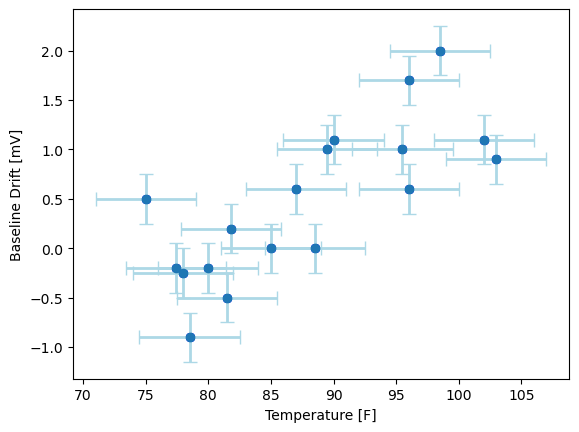

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = np.array([78.5, 81.5, 98.5, 95.5, 75.0, 78.00, 85.0, 89.5, 96.0, 90.0, 81.8, 77.4, 88.5, 96.0, 102.0, 103.0, 87.0, 80.0])
y = np.array([-0.9, -0.5,    2,    1,  0.5, -0.25,    0,  1.0,  1.7,  1.1,  0.2, -0.2,    0,  0.6,   1.1,   0.9,  0.6, -0.2])


# Error data for x and y
x_err = np.full(18,4)
y_err = np.full(18,0.25)

# Scatter plot
plt.scatter(x, y, color='blue')

# Error bars for x and y, with different colors
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='lightblue', capsize=5, elinewidth=2)

# Adding labels and legend
plt.xlabel('Temperature [F]')
plt.ylabel('Baseline Drift [mV]')

# Show the plot
plt.show()


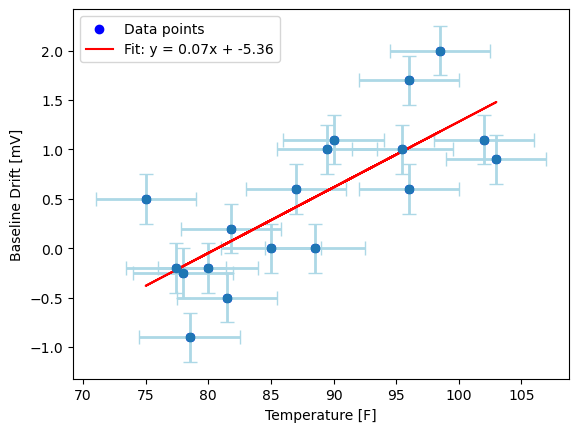

((0.06642943494547084, -5.362282300314969),
 array([[ 1.95899026e-04, -1.72304076e-02],
        [-1.72304076e-02,  1.53018360e+00]]))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sample data
x = np.array([78.5, 81.5, 98.5, 95.5, 75.0, 78.0, 85.0, 89.5, 96.0, 90.0, 81.8, 77.4, 88.5, 96.0, 102.0, 103.0, 87.0, 80.0])
y = np.array([-0.9, -0.5,    2,    1,  0.5, -0.25,    0,  1.0,  1.7,  1.1,  0.2, -0.2,    0,  0.6,   1.1,   0.9,  0.6, -0.2])

# Error data for x and y
x_err = np.full(18,4)
y_err = np.full(18,0.25)

# Define a linear function to fit
def linear_func(x, m, b):
    return m * x + b

# Fit the line to the data
params, covariance = curve_fit(linear_func, x, y)

# Extract the slope (m) and intercept (b) from the fitting
slope, intercept = params

# Generate fitted y values based on the linear fit
y_fit = linear_func(x, slope, intercept)

# Scatter plot with error bars
plt.scatter(x, y, color='blue', label='Data points')
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='lightblue', capsize=5, elinewidth=2)

# Plot the fitted line
plt.plot(x, y_fit, color='red', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')

# Adding labels and legend
plt.xlabel('Temperature [F]')
plt.ylabel('Baseline Drift [mV]')
plt.legend()

# Show the plot
plt.show()

# Return the fit parameters
(slope, intercept), covariance



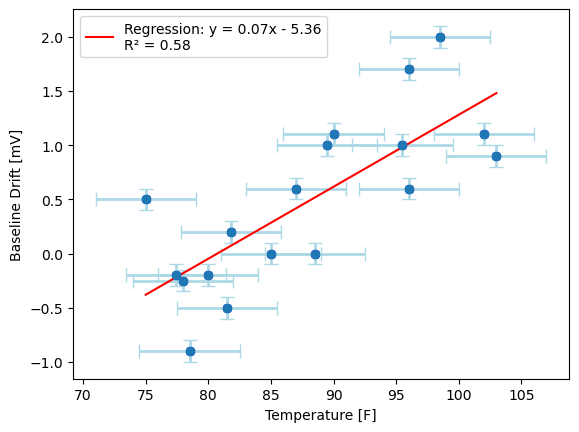

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Sample data
x = np.array([78.5, 81.5, 98.5, 95.5, 75.0, 78.0, 85.0, 89.5, 96.0, 90.0, 81.8, 77.4, 88.5, 96.0, 102.0, 103.0, 87.0, 80.0])
y = np.array([-0.9, -0.5,    2,    1,  0.5, -0.25,    0,  1.0,  1.7,  1.1,  0.2, -0.2,    0,  0.6,   1.1,   0.9,  0.6, -0.2])

# Error data for x and y
x_err = np.full(18,4)
y_err = np.full(18,0.1)

# Reshape x for scikit-learn (it expects a 2D array for input)
x_reshaped = x.reshape(-1, 1)

# Perform linear regression
model = LinearRegression()
model.fit(x_reshaped, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Generate predicted y values based on the regression model
y_fit = model.predict(x_reshaped)

# Generate a range of x values for plotting the regression line
x_range = np.linspace(min(x), max(x), 500).reshape(-1, 1)
y_fit_range = model.predict(x_range)

# Calculate R²
r2 = r2_score(y, y_fit)

# Scatter plot with error bars
plt.scatter(x, y, color='blue')
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='lightblue', capsize=5, elinewidth=2)

# Plot the regression line
plt.plot(x_range, y_fit_range, color='red', label=f'Regression: y = {slope:.2f}x - {-intercept:.2f}\nR² = {r2:.2f}')

# Adding labels and legend
plt.xlabel('Temperature [F]')
plt.ylabel('Baseline Drift [mV]')
plt.legend()

# Show the plot
plt.show()
